In [154]:
import os

import numpy as np
from sklearn.utils import shuffle

In [ ]:
names = [e[:-4] for e in os.listdir('./drive/MyDrive/MaskGA_Net/datasets/MoNuSeg/original/Input_Images')]

In [152]:
a = np.array(['aa', 'bb', 'cc'])
list(a[[0, 2]])

['aa', 'cc']

In [158]:
shuffled_names = shuffle(np.arange(30), random_state=12)
size_of_fold = len(shuffled_names)//10

print(size_of_fold)
i = 9
val_i = np.arange(i*size_of_fold, (i+1)*size_of_fold)
test_i = np.arange((i+1)%10*size_of_fold, ((i+1)%10+1)*size_of_fold)

for i, e in enumerate(shuffled_names):
    if i % size_of_fold == 0 and i != 0:
        print(';', end='')
    print(f'{e:<3}', end='')

print()
print('val:', shuffled_names[val_i])
print('test:', shuffled_names[test_i])
print('train:', end='')

for i, e in enumerate(np.delete(shuffled_names, np.concatenate([val_i, test_i], 0))):
    if i % size_of_fold == 0 and i != 0:
        print(';', end='')
    print(f'{e:>3}', end='')

3
7  22 18 ;14 1  21 ;4  15 23 ;9  20 8  ;19 0  10 ;28 29 25 ;13 5  26 ;16 12 24 ;3  2  17 ;6  27 11 
val: [ 6 27 11]
test: [ 7 22 18]
train: 14  1 21;  4 15 23;  9 20  8; 19  0 10; 28 29 25; 13  5 26; 16 12 24;  3  2 17

In [ ]:
import os

os.chdir('./drive/MyDrive/MaskGA_Net')

In [ ]:
!pip install -r requirements.txt

In [29]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A

import torch
import random

In [22]:
a = np.array(Image.open('./datasets/TNBC/original/Input_Images/01_1.png'))[:,:,:3]
b = np.array(Image.open('./datasets/TNBC/original/Labels_GT_PNG/01_1.png'))//255
c = np.array(Image.open('./datasets/TNBC/original/Labels_Vor_r0/01_1.png'))//127
c1 = np.array(Image.open('./datasets/TNBC/original/Labels_Vor_r0/01_1.png'))//127 == 1
c2 = np.array(Image.open('./datasets/TNBC/original/Labels_Vor_r0/01_1.png'))//127 == 2
d = np.array(Image.open('./datasets/TNBC/original/norm1/Labels_Sp_r0/stage0/01_1.png'))//255

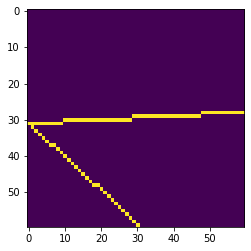

In [11]:
plt.imshow(c2[:60,:60])

In [ ]:
a.shape, b.shape, c.shape, d.shape, a.dtype, b.dtype,c.dtype,d.dtype

In [ ]:
A.__version__

'1.1.0'

In [51]:
random.seed(12)

In [129]:
aug = A.Compose([
                #Geometric
                A.Rotate(p=0.7),
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                A.Affine(translate_percent={'x': (-0.125, 0.125), 'y': (-0.125, 0.125)}, p=1),

                #Noise
                A.GaussNoise(p=0.7),
                A.GaussianBlur(sigma_limit=(0.0, 4.0), p=1),

                # #color
                A.RandomBrightnessContrast(p=0.7),
                A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20, val_shift_limit=20, p=1)         
])       

In [160]:
np.array(augged['masks']).shape

(3, 512, 512)

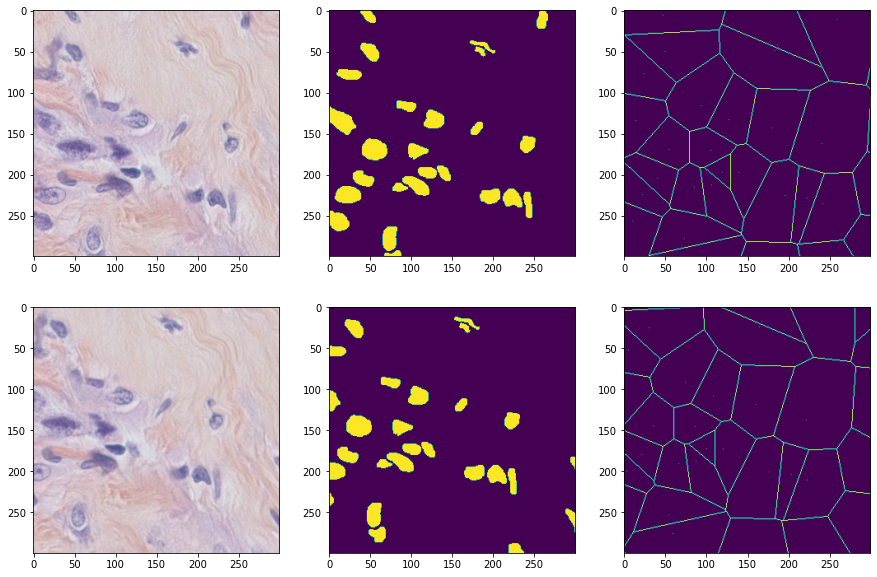

In [132]:
augged = aug(image=a, masks=[b, c, d])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

H=300
W=300

axs[0][0].imshow(a[:H, :W])
axs[0][1].imshow(b[:H, :W])
axs[0][2].imshow(c[:H, :W])

axs[1][0].imshow(augged['image'][:H, :W])
axs[1][1].imshow(augged['masks'][0][:H, :W])
axs[1][2].imshow(augged['masks'][1][:H, :W])

plt.show()

In [71]:
!python r1.py

0.5714025946899135
0.4288890546751146
0.5780913011344704
0.20609823213950174
0.81332125135732
0.8235888725334455
0.6534725339011758
0.16022955651881965
0.5206693596399246
0.32777281162209315
